In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data
tru = data.DataReader('TRU', 'yahoo',start='1/1/2009')
tru.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-25,25.750000,24.51,24.620001,25.400000,25922300.0,25.125340
2015-06-26,25.889999,24.75,25.490000,24.850000,3807900.0,24.581289
2015-06-29,24.940001,23.42,24.010000,24.370001,1871200.0,24.106478
2015-06-30,25.740000,24.50,24.850000,25.100000,840800.0,24.828587
2015-07-01,25.299999,24.52,25.010000,24.950001,780000.0,24.680208


In [5]:
#Next, we calculate the number of days that have elapsed in our chosen time window
time_elapsed = (tru.index[-1] - tru.index[0]).days

In [8]:
#Current price / first record (e.g. price at beginning of 2009) provides us with the total growth %
total_growth = (tru['Adj Close'][-1] / tru['Adj Close'][1])

#Next, we want to annualize this percentage
#First, we convert our time elapsed to the # of years elapsed
number_of_years = time_elapsed / 365.0
#Second, we can raise the total growth to the inverse of the # of years
#(e.g. ~1/10 at time of writing) to annualize our growth rate
cagr = total_growth ** (1/number_of_years) - 1

#Now that we have the mean annual growth rate above,
#we'll also need to calculate the standard deviation of the
#daily price changes
std_dev = tru['Adj Close'].pct_change().std()

#Next, because there are roughy ~252 trading days in a year,
#we'll need to scale this by an annualization factor

number_of_trading_days = 252
std_dev = std_dev * math.sqrt(number_of_trading_days)

#From here, we have our two inputs needed to generate random
#values in our simulation
print ("cagr (mean returns) : ", str(round(cagr,4)))
print ("std_dev (standard deviation of return : )", str(round(std_dev,4)))

cagr (mean returns) :  0.2685
std_dev (standard deviation of return : ) 0.3084


In [15]:
#Generate random values for 1 year's worth of trading (252 days),
#using numpy and assuming a normal distribution
daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days), number_of_trading_days)+1


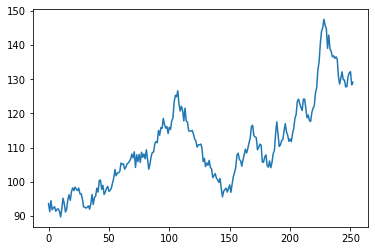

In [16]:
#Now that we have created a random series of future
#daily return %s, we can simply apply these forward-looking
#to our last stock price in the window, effectively carrying forward
#a price prediction for the next year
#This distribution is known as a 'random walk'

price_series = [tru['Adj Close'][-1]]

for j in daily_return_percentages:
    price_series.append(price_series[-1] * j)

#Great, now we can plot of single 'random walk' of stock prices
plt.plot(price_series)
plt.show()

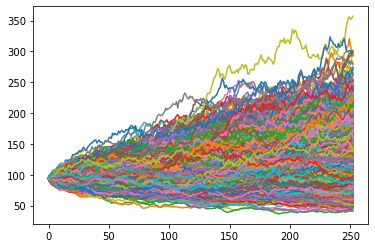

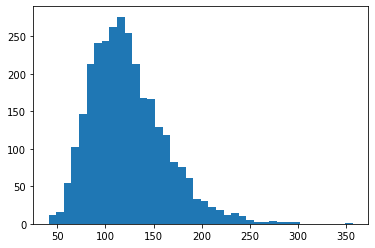

In [17]:
#Now that we've created a single random walk above,
#we can simulate this process over a large sample size to
#get a better sense of the true expected distribution
number_of_trials = 3000

#set up an additional array to collect all possible
#closing prices in last day of window.
#We can toss this into a histogram
#to get a clearer sense of possible outcomes
closing_prices = []

for i in range(number_of_trials):
    #calculate randomized return percentages following our normal distribution
    #and using the mean / std dev we calculated above
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [tru['Adj Close'][-1]]

    for j in daily_return_percentages:
        #extrapolate price out for next year
        price_series.append(price_series[-1] * j)

    #append closing prices in last day of window for histogram
    closing_prices.append(price_series[-1])

    #plot all random walks
    plt.plot(price_series)



plt.show()

#plot histogram
plt.hist(closing_prices,bins=40)

plt.show()

In [18]:
#from here, we can check the mean of all ending prices
#allowing us to arrive at the most probable ending point
mean_end_price = round(np.mean(closing_prices),2)
print("Expected price: ", str(mean_end_price))

Expected price:  123.52


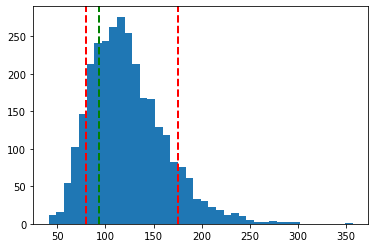

In [19]:
#lastly, we can split the distribution into percentiles
#to help us gauge risk vs. reward

#Pull top 10% of possible outcomes
top_ten = np.percentile(closing_prices,100-10)

#Pull bottom 10% of possible outcomes
bottom_ten = np.percentile(closing_prices,10);

#create histogram again
plt.hist(closing_prices,bins=40)
#append w/ top 10% line
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
#append w/ bottom 10% line
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
#append with current price
plt.axvline(tru['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)

plt.show()